In [1]:
import os
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as ocm
import pandas as pd

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')
raw_dir = os.path.join(data_dir,'raw')
int_dir = os.path.join(data_dir,'interim')
fig_dir = os.path.join(proj_dir,'reports','tidal_melting','figures')
tab_dir = os.path.join(proj_dir,'reports','tidal_melting','tables')

src_dir = os.path.join(proj_dir,'src')
sys.path.append(src_dir)

%load_ext autoreload
%autoreload 2

In [2]:
# load tides and no tides hourly melting over two month
file_path = os.path.join(raw_dir,'waom4_hr','ocean_avg_0010.nc')
tides = xr.open_dataset(file_path)

file_path = os.path.join(raw_dir,'waom4_hr_nt','ocean_avg_0010.nc')
no_tides = xr.open_dataset(file_path)

# load grid
grid_path = os.path.join(int_dir,'grd4_dV.nc')
grd = xr.open_dataset(grid_path)

# spatial averaging

## individual cell

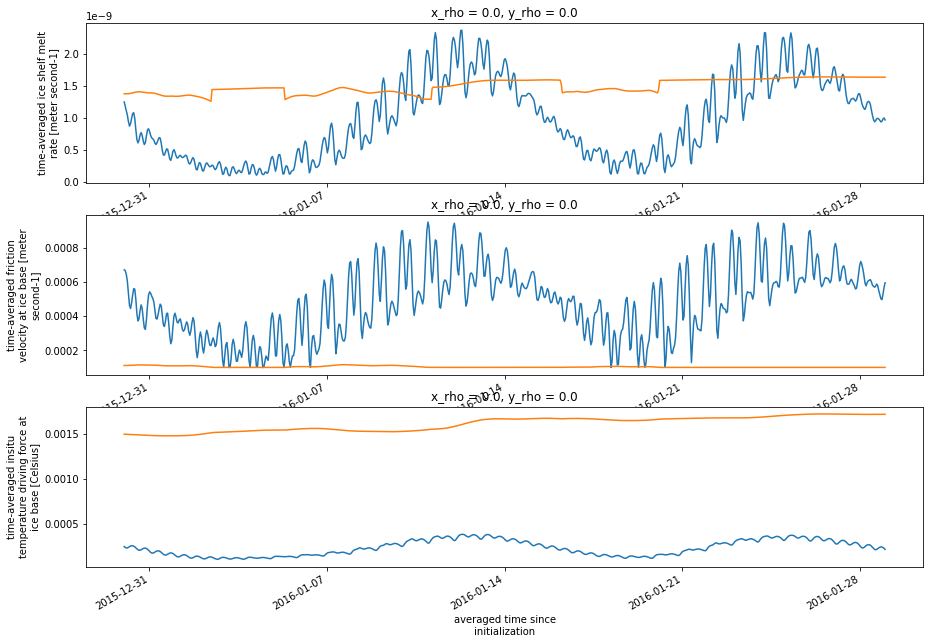

In [3]:
%matplotlib inline
cell = {'xi_rho':460,'eta_rho':850}
fig,axes = plt.subplots(nrows=3,figsize=(15,10))
for key,ax in zip(['m','ustar','Tstar'],axes):
    tides[key].isel(cell).plot(ax=ax)
    no_tides[key].isel(cell).plot(ax=ax)
    ax.autoscale()
plt.show()

In [83]:
def plot_m_mstar(m,mstar,title):
    fig,ax = plt.subplots(figsize=(15,6))
    m_norm = m/m.mean()
    mstar_norm = mstar/mstar.mean()
    mstar_norm = mstar_norm+(m_norm[0]-mstar_norm[0])
    m_norm.plot(ax=ax,label='m',alpha=0.5)
    mstar_norm.plot(ax=ax,label='mstar',alpha=0.5)
    ax.autoscale()
    ax.legend()
    ax.set_title(title)
    plt.show()

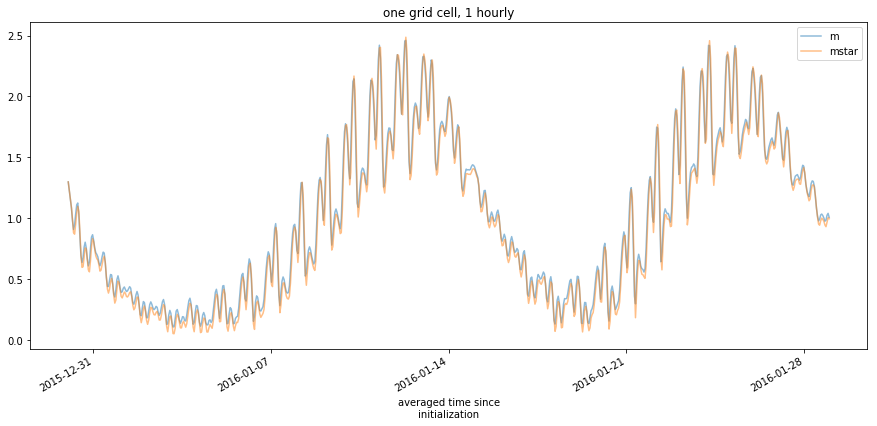

In [85]:
ut = tides.ustar.isel(cell)*tides.Tstar.isel(cell)
m = tides.m.isel(cell)

plot_m_mstar(m,ut,'one grid cell, 1 hourly')

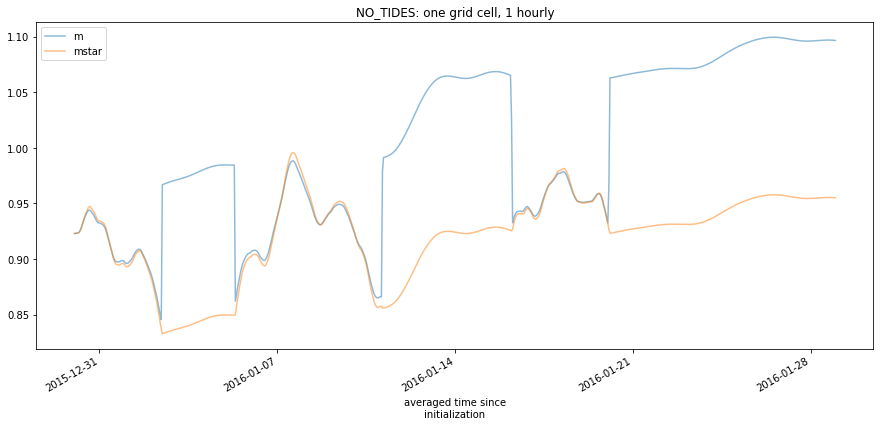

In [84]:
ut = no_tides.ustar.isel(cell)*no_tides.Tstar.isel(cell)
m = no_tides.m.isel(cell)

plot_m_mstar(m,ut,'NO_TIDES: one grid cell, 1 hourly')

## 20x20 grid cells (80x80 km)

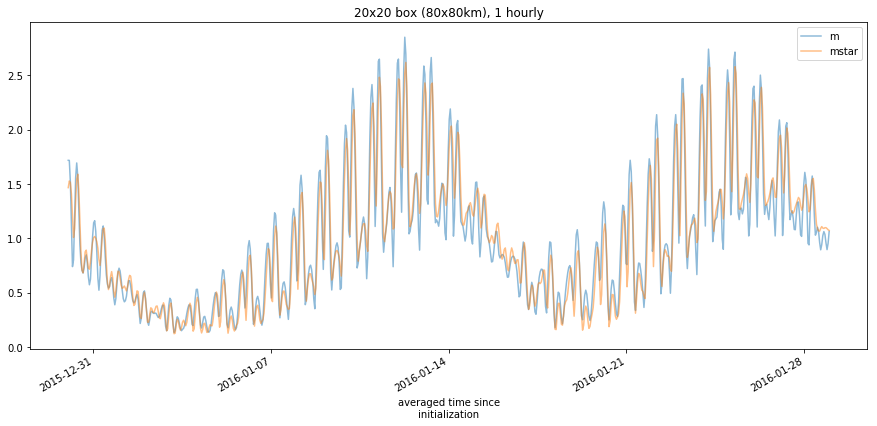

In [52]:
box = {'xi_rho':slice(440,460),'eta_rho':slice(840,860)}
ut = (tides.ustar.isel(box)).mean(('xi_rho','eta_rho'))*(tides.Tstar.isel(box)).mean(('xi_rho','eta_rho'))
m = tides.m.isel(box).mean(('xi_rho','eta_rho'))

plot_m_mstar(m,ut,'20x20 box (80x80km), 1 hourly')

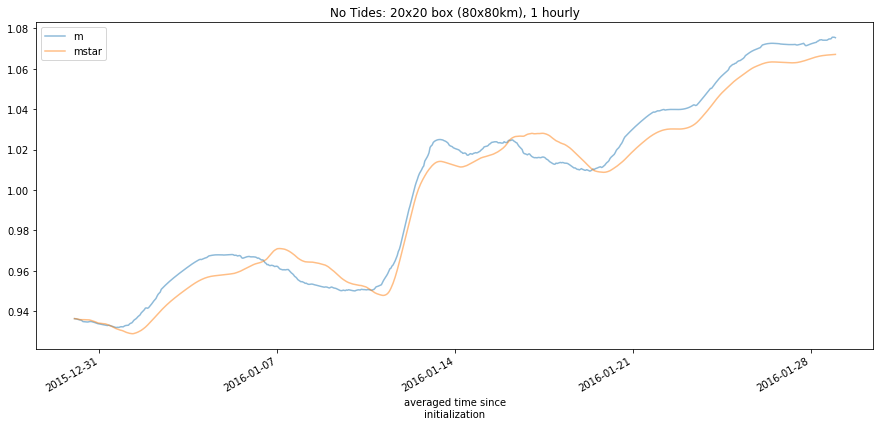

In [86]:
ut = (no_tides.ustar.isel(box)).mean(('xi_rho','eta_rho'))*(no_tides.Tstar.isel(box)).mean(('xi_rho','eta_rho'))
m = no_tides.m.isel(box).mean(('xi_rho','eta_rho'))

plot_m_mstar(m,ut,'No Tides: 20x20 box (80x80km), 1 hourly')

## Whole ice shelf (Ronne)

In [44]:
shelves_masks_path = os.path.join(int_dir,'shelves4.npy') 
shelves = np.load(shelves_masks_path,allow_pickle=True).item()
shelves = {k: v for k, v in shelves.items() if v['mask'].any()}

ronne = shelves['Ronne']['mask']

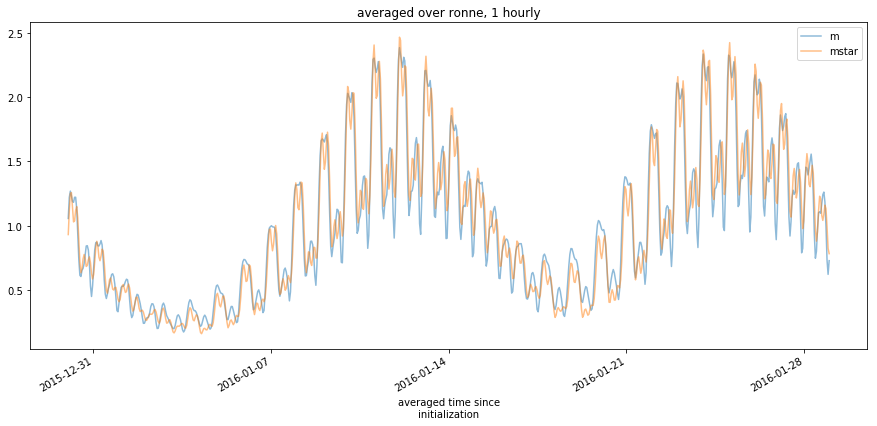

In [72]:
ut = (tides.ustar.where(ronne)).mean(('xi_rho','eta_rho'))*\
(tides.Tstar.where(ronne)).mean(('xi_rho','eta_rho'))
m = tides.m.where(ronne).mean(('xi_rho','eta_rho'))

plot_m_mstar(m,ut,'averaged over ronne, 1 hourly')

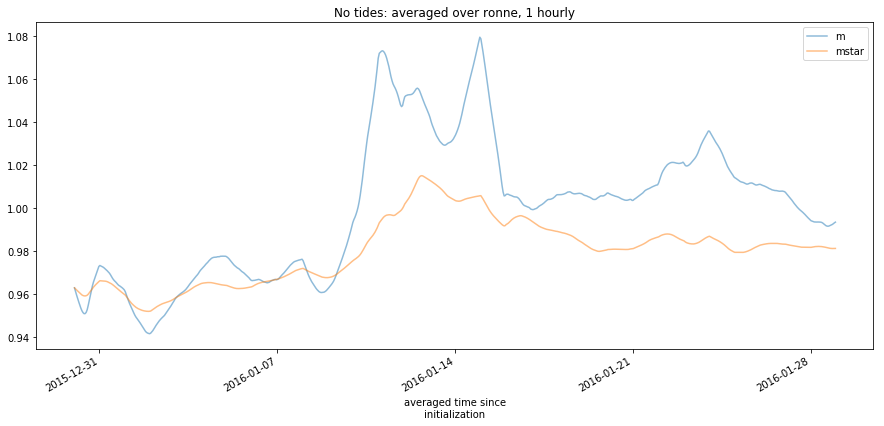

In [87]:
ut = (no_tides.ustar.where(ronne)).mean(('xi_rho','eta_rho'))*\
(no_tides.Tstar.where(ronne)).mean(('xi_rho','eta_rho'))
m = no_tides.m.where(ronne).mean(('xi_rho','eta_rho'))

plot_m_mstar(m,ut,'No tides: averaged over ronne, 1 hourly')

# time averaging

## 1D

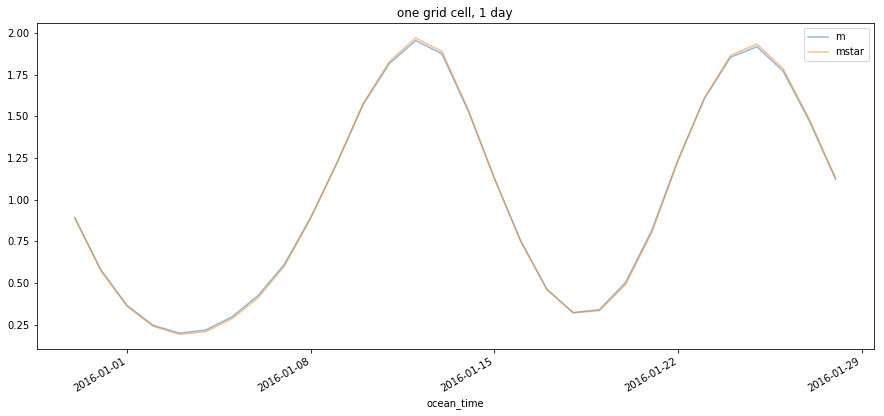

In [67]:
period='1D'

ut = tides.ustar.isel(cell).resample(ocean_time=period).mean() * tides.Tstar.isel(cell).resample(ocean_time=period).mean()
m = tides.m.isel(cell).resample(ocean_time=period).mean()

plot_m_mstar(m,ut,'one grid cell, 1 day')

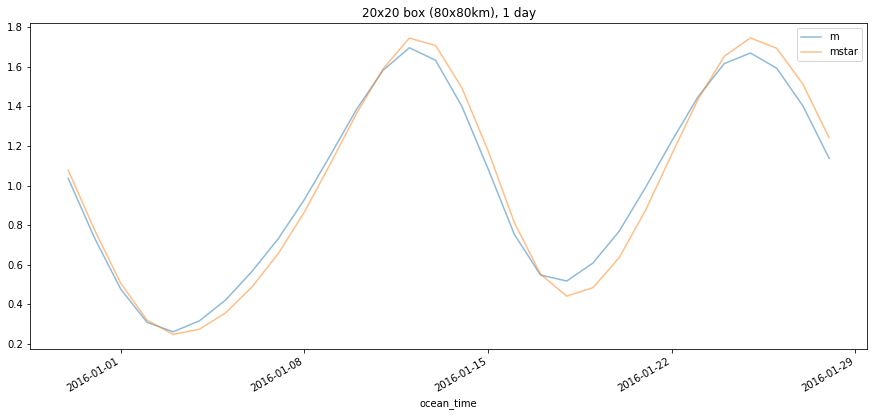

In [68]:
ut = tides.ustar.isel(box).resample(ocean_time=period).mean() * tides.Tstar.isel(box).resample(ocean_time=period).mean()
m = tides.m.isel(box).resample(ocean_time=period).mean()

plot_m_mstar(m,ut,'20x20 box (80x80km), 1 day')

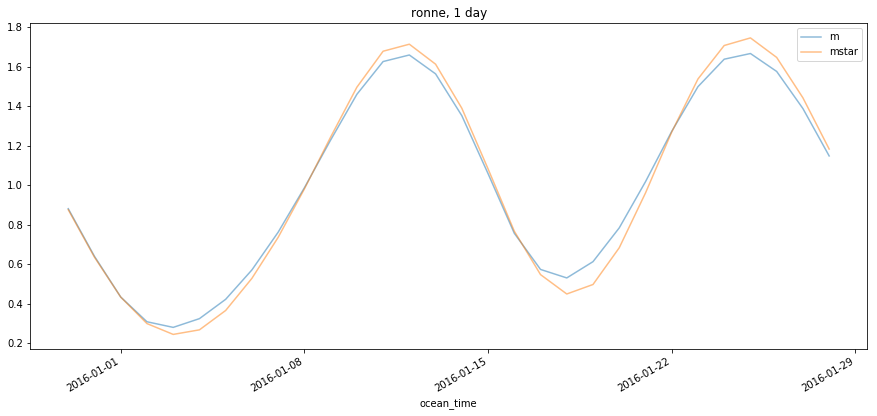

In [79]:
period = '1D'

ut = (tides.ustar.where(ronne)).mean(('xi_rho','eta_rho')).resample(ocean_time=period).mean()*\
(tides.Tstar.where(ronne)).mean(('xi_rho','eta_rho')).resample(ocean_time=period).mean()
m = tides.m.where(ronne).mean(('xi_rho','eta_rho')).resample(ocean_time=period).mean()

plot_m_mstar(m,ut,'ronne, 1 day')

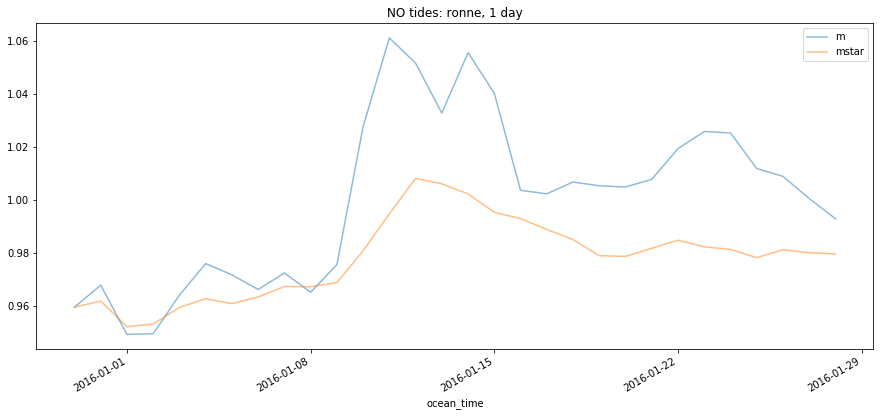

In [88]:
period = '1D'

ut = (no_tides.ustar.where(ronne)).mean(('xi_rho','eta_rho')).resample(ocean_time=period).mean()*\
(no_tides.Tstar.where(ronne)).mean(('xi_rho','eta_rho')).resample(ocean_time=period).mean()
m = no_tides.m.where(ronne).mean(('xi_rho','eta_rho')).resample(ocean_time=period).mean()

plot_m_mstar(m,ut,'NO tides: ronne, 1 day')

## 7D

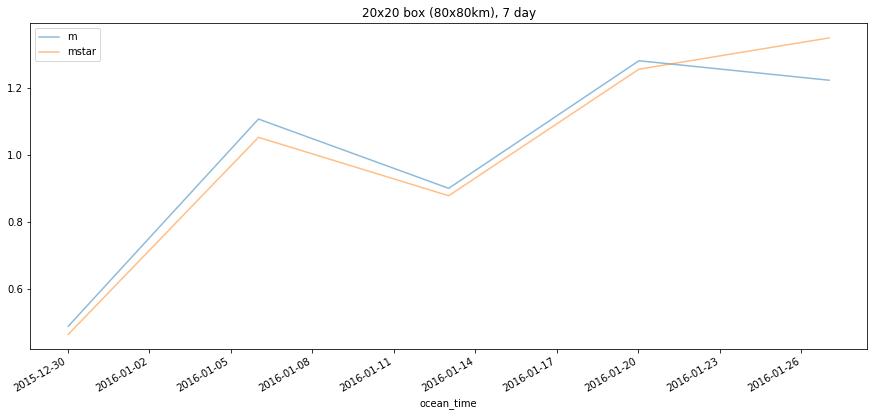

In [75]:
period = '7D'

ut = tides.ustar.isel(box).resample(ocean_time=period).mean() * tides.Tstar.isel(box).resample(ocean_time=period).mean()
m = tides.m.isel(box).resample(ocean_time=period).mean()

plot_m_mstar(m,ut,'20x20 box (80x80km), 7 day')

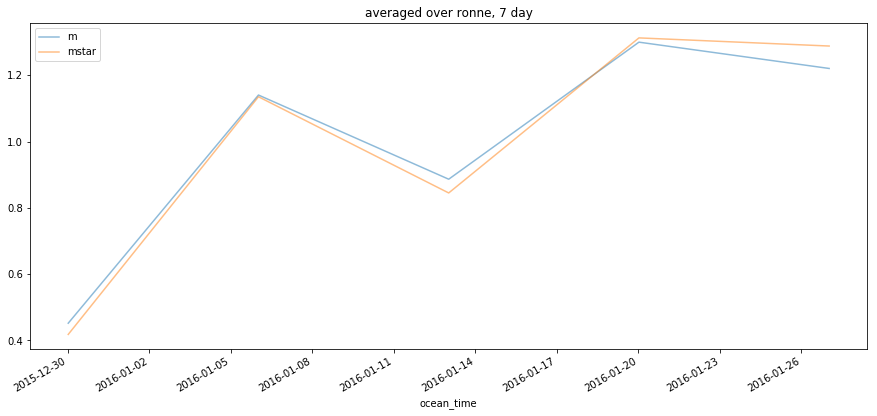

In [78]:
ut = (tides.ustar.where(ronne)).mean(('xi_rho','eta_rho')).resample(ocean_time=period).mean()*\
(tides.Tstar.where(ronne)).mean(('xi_rho','eta_rho')).resample(ocean_time=period).mean()
m = tides.m.where(ronne).mean(('xi_rho','eta_rho')).resample(ocean_time=period).mean()

plot_m_mstar(m,ut,'averaged over ronne, 7 day')

# Ice shelf averages

In [ ]:
mak

In [77]:
def scatter_tides(x_t,y_t,x_nt,y_nt,title,xlab,ylab,save=False):
    
    plt.close()
    fig,ax = plt.subplots(figsize=(12,10))
    
    x_ar={}
    y_ar={}
    
    for t,c,pos in zip(['_nt','_t'],['g','r'],[0.9,0.8]):
        
        x_all=[]
        y_all=[]

        for k,v in x_t.items():
        
            if t == '_nt':
                x_ar[k]=[]
                y_ar[k]=[]
        
                x=x_nt[k]
                y=y_nt[k]
                   
                ax.plot(x,y,'.',label=k,c=c)
                #ax.text(x,y,k)
                
            elif t == '_t':
        
                x=x_t[k]
                y=y_t[k]
                   
                ax.plot(x,y,'.',label=k,c=c)

            x_ar[k].append(x)
            y_ar[k].append(y)
        
            x_all.append(x)
            y_all.append(y)
            
        x_all = np.array(x_all).squeeze()
        y_all = np.array(y_all).squeeze()
    
        xp,p,Rsquared = polyfit(x_all,y_all,1)        
        ax.plot(xp,p(xp),'-',alpha=0.3,c=c)
        
        if t=='_t':
            label='with tides:'
        else:
            label='without tides:'
            
        ax.text(0.01,pos,label+str(p)+' ($r^2$ = %.2f)' %(Rsquared),transform=ax.transAxes,
                fontsize=16,color=c)       
    
    #for key in x_ar:
    #    ax.annotate("", xy=(x_ar[key][1],y_ar[key][1]), xytext=(x_ar[key][0],y_ar[key][0]),
    #                arrowprops=dict(arrowstyle="->",color='k',alpha=0.3))
    
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title,fontsize=18)
    
    if save:
        plt.savefig(os.path.join(fig_dir,'scatter_shelfavg_'+title.replace('/','_').replace(' ','_')+'.png'),format='png',dpi=300,bbox_inches = "tight")    
    plt.show()
    
    return

def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
     # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    Rsquared = ssreg / sstot
    
    xp =np.linspace(min(x),max(x),100)
    
    return xp,p,Rsquared

def plot_regres(ax,x_all,y_all,deg):
    xp,p,Rsquared = polyfit(x_all,y_all,deg)        
    ax.plot(xp,p(xp),'-')
    ax.text(0.05,0.8,str(p)+'\n($r^2$ = %.2f)' %(Rsquared),transform=ax.transAxes)
    
    return p

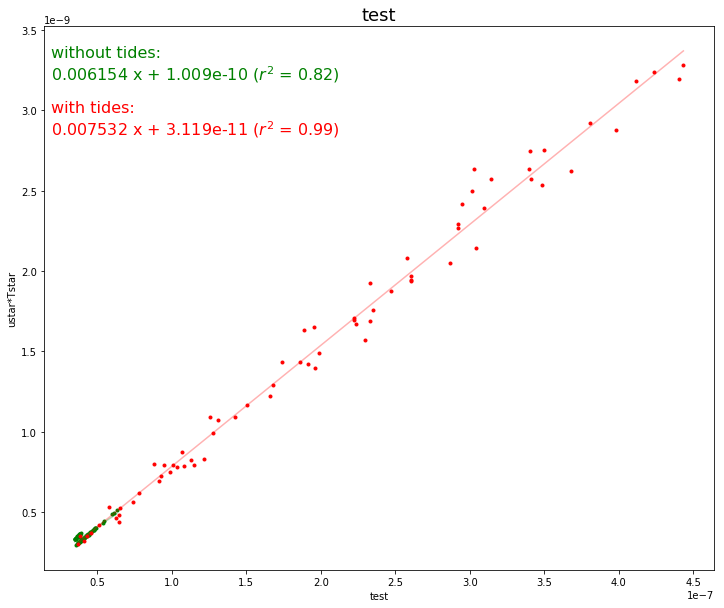

({Timestamp('2015-12-30 00:30:00'): [3.916908e-08, 2.3504569e-07],
  Timestamp('2015-12-30 10:30:00'): [3.8764647e-08, 2.2371977e-07],
  Timestamp('2015-12-30 20:30:00'): [3.8496182e-08, 1.7379305e-07],
  Timestamp('2015-12-31 06:30:00'): [3.8352333e-08, 1.5021972e-07],
  Timestamp('2015-12-31 16:30:00'): [3.8297404e-08, 1.0382046e-07],
  Timestamp('2016-01-01 02:30:00'): [3.828828e-08, 1.0118024e-07],
  Timestamp('2016-01-01 12:30:00'): [3.8318866e-08, 9.870322e-08],
  Timestamp('2016-01-01 22:30:00'): [4.1188564e-08, 6.491602e-08],
  Timestamp('2016-01-02 08:30:00'): [4.39836e-08, 6.5185084e-08],
  Timestamp('2016-01-02 18:30:00'): [4.5724157e-08, 5.134804e-08],
  Timestamp('2016-01-03 04:30:00'): [4.766604e-08, 4.3351967e-08],
  Timestamp('2016-01-03 14:30:00'): [4.887559e-08, 4.6074963e-08],
  Timestamp('2016-01-04 00:30:00'): [4.8985697e-08, 6.46278e-08],
  Timestamp('2016-01-04 10:30:00'): [4.7410584e-08, 3.7461962e-08],
  Timestamp('2016-01-04 20:30:00'): [4.45093e-08, 5.804337e

In [55]:
%matplotlib inline
x_t = (tides.ustar.isel(sel)[::10] * tides.Tstar.isel(sel)[::10]).to_series()
y_t = tides.m.isel(sel)[::10].to_series()

x_nt = (no_tides.ustar.isel(sel)[::10] * no_tides.Tstar.isel(sel)[::10]).to_series()
y_nt = no_tides.m.isel(sel)[::10].to_series()

scatter_tides(x_t,y_t,x_nt,y_nt,'test','test','ustar*Tstar','ismr')

<IPython.core.display.Javascript object>


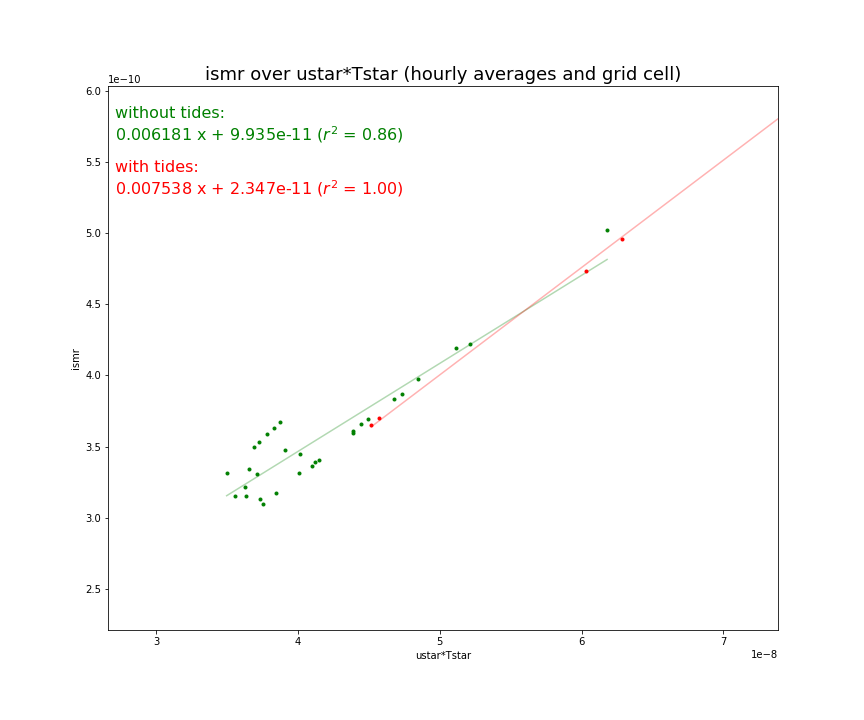

In [89]:
tides_sel = tides[['m','ustar','Tstar']].isel(sel).resample(ocean_time='1h').mean()
no_tides_sel = no_tides[['m','ustar','Tstar']].isel(sel).resample(ocean_time='1h').mean()

x_t = (tides_sel.ustar*tides_sel.Tstar).to_series()
y_t = tides_sel.m.to_series()

x_nt = (no_tides_sel.ustar*no_tides_sel.Tstar).to_series()
y_nt = no_tides_sel.m.to_series()

%matplotlib notebook
scatter_tides(x_t,y_t,x_nt,y_nt,'ismr over ustar*Tstar (hourly averages and grid cell)','ustar*Tstar','ismr')

In [94]:
sel = {'xi_rho':slice(460,470),'eta_rho':slice(809,819),'ocean_time':slice(0,100)}

tides_sel = tides[['m','ustar','Tstar']].isel(sel).mean(('xi_rho','eta_rho'))

tides_sel.m

<xarray.DataArray 'm' (ocean_time: 100)>
array([5.069072e-10, 5.424743e-10, 5.960593e-10, 6.524030e-10, 6.877923e-10,
       6.870582e-10, 6.460830e-10, 5.710301e-10, 5.111377e-10, 4.874158e-10,
       4.641596e-10, 4.304268e-10, 4.156272e-10, 4.053402e-10, 3.940592e-10,
       4.021933e-10, 4.327278e-10, 4.592081e-10, 4.614029e-10, 4.395891e-10,
       4.123468e-10, 3.934457e-10, 3.811163e-10, 3.754936e-10, 3.880554e-10,
       4.087326e-10, 4.349240e-10, 4.699001e-10, 5.038016e-10, 5.209977e-10,
       5.135273e-10, 4.725124e-10, 4.119905e-10, 3.721016e-10, 3.601504e-10,
       3.478995e-10, 3.360723e-10, 3.307955e-10, 3.187184e-10, 3.122668e-10,
       3.287978e-10, 3.573671e-10, 3.689088e-10, 3.529810e-10, 3.117337e-10,
       2.712081e-10, 2.571737e-10, 2.650468e-10, 2.787698e-10, 2.962214e-10,
       3.067107e-10, 3.169643e-10, 3.367139e-10, 3.600920e-10, 3.705174e-10,
       3.620179e-10, 3.252956e-10, 2.790027e-10, 2.584933e-10, 2.613787e-10,
       2.598507e-10, 2.579747e-10, 

<IPython.core.display.Javascript object>


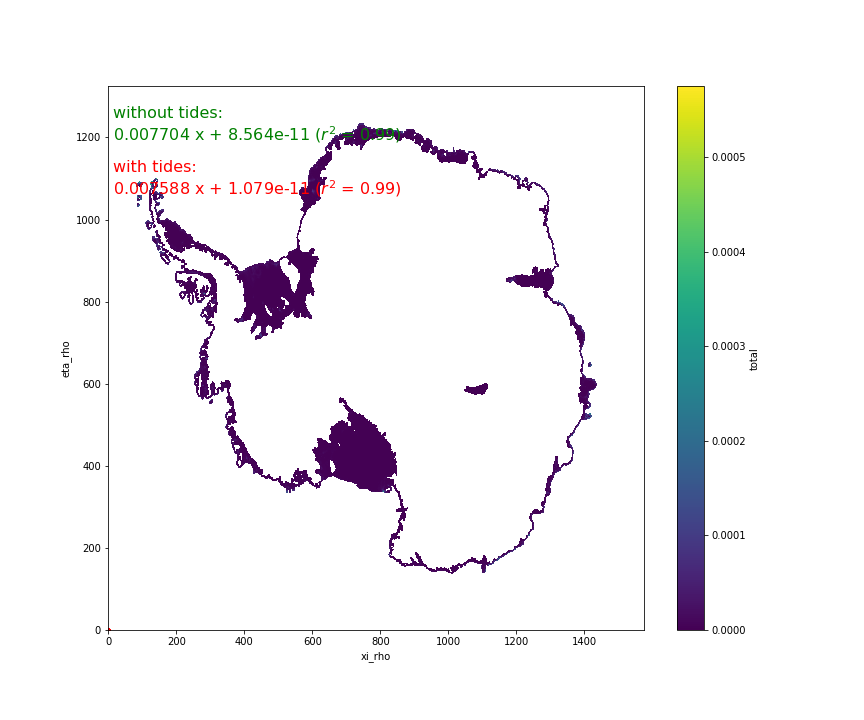

In [95]:
#sel = {'xi_rho':slice(460,470),'eta_rho':slice(809,819)}

tides_sel = tides[['m','ustar','Tstar']].isel(sel).mean(('xi_rho','eta_rho'))
no_tides_sel = no_tides[['m','ustar','Tstar']].isel(sel).mean(('xi_rho','eta_rho'))

x_t = (tides_sel.ustar*tides_sel.Tstar).to_series()
y_t = tides_sel.m.to_series()

x_nt = (no_tides_sel.ustar*no_tides_sel.Tstar).to_series()
y_nt = no_tides_sel.m.to_series()

%matplotlib notebook
scatter_tides(x_t,y_t,x_nt,y_nt,'ismr over ustar*Tstar (hourly averages and grid cell)','ustar*Tstar','ismr')

In [105]:
from visualization.plot_map import *

In [ ]:
sel = {'ocean_time':slice(0,24)}
uT = (tides.ustar*tides.Tstar).mean('ocean_time')

In [ ]:
import matplotlib as mpl
def scatter_tides_3D(x_nt,y_nt,z_nt,x_t,y_t,z_t,title,xlab,ylab,zlab,save=False):
   
 #   matplotlib.rcParams.update({'font.size': 22}) 

    plt.close()
    fig,ax = plt.subplots(figsize=(12,6))
    
    c_min = min(z_t.min(),z_nt.min())
    c_max = max(z_t.max(),z_t.max())
    cmap = plt.get_cmap('rainbow')
    
    for k,v in x_nt.items():
        x1 = x_nt[k]
        y1 = y_nt[k]
        c1 = cmap((z_nt[k]-c_min)/(c_max-c_min))
        
        ax.plot(x1,y1,'s',c=c1)
        
        x2 = x_t[k]
        y2 = y_t[k]
        c2 = cmap((z_t[k]-c_min)/(c_max-c_min))
        
        ax.plot(x2,y2,'o',c=c2)
        
        ax.annotate("", xy=(x2,y2), xytext=(x1,y1),
                    arrowprops=dict(arrowstyle="->",color='k',alpha=0.1))
    
    norm = mpl.colors.Normalize(vmin=c_min,vmax=c_max)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm,label=zlab)
    
    ylim = ax.get_ylim()    
    x_min,x_max = ax.get_xlim()
    x=np.linspace(0,x_max,100)
    
    for c in np.linspace(0.00003,0.003,10):
        ax.plot(x,c/x,'k-',alpha=0.1)
    
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title,fontsize=22)
    ax.set_ylim(ylim)
    
    if save:
        plt.savefig(os.path.join(fig_dir,'scatter_tides_3D'+title.replace('/','_').replace(' ','_')+'.png'),format='png',dpi=300,bbox_inches = "tight")    
    
    plt.show()